## 혼동 행렬 (Confusion Matrix) 직접 구현

혼동 행렬은 분류 모델의 성능을 평가하는 핵심 도구입니다. 라이브러리 함수에 의존하지 않고 직접 구현해보면, 그 내부 동작 원리와 각 평가지표의 의미를 훨씬 명확하게 이해할 수 있습니다. 이 노트북에서는 Python과 `numpy`만을 사용하여 혼동 행렬을 계산하고, 관련 지표들을 유도하는 과정을 단계별로 설명합니다.

### 1. 기본 설정
배열 연산을 위한 `numpy`와 시각화를 위한 `matplotlib`, `seaborn`만 임포트합니다. `scikit-learn`은 사용하지 않습니다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 예시 데이터 준비

모델의 예측 결과를 평가하기 위한 간단한 예시 데이터 생성. 이진 분류(Binary Classification) 상황을 가정.
- `y_true`: 실제 정답 값 (Ground Truth)
- `y_pred`: 모델이 예측한 값

(여기서 1을 Positive, 0을 Negative로 가정)

In [7]:
# 실제 정답과 모델의 예측
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

print("실제 정답 (y_true):", y_true)
print("모델 예측 (y_pred):", y_pred)

실제 정답 (y_true): [1 0 1 1 0 1 0 0 1 1]
모델 예측 (y_pred): [1 1 1 0 0 1 0 0 1 1]


### 3. 혼동 행렬 직접 계산하기

실제 값과 예측 값을 하나씩 비교하며 TP, TN, FP, FN의 개수를 직접 셉니다.

- **TP (True Positive)**: 실제 1, 예측 1 (맞춤)
- **TN (True Negative)**: 실제 0, 예측 0 (맞춤)
- **FP (False Positive)**: 실제 0, 예측 1 (틀림 - Type I Error)
- **FN (False Negative)**: 실제 1, 예측 0 (틀림 - Type II Error)

In [8]:
def compute_confusion_matrix(y_true, y_pred):
    """scikit-learn 없이 혼동 행렬의 4가지 요소를 계산합니다."""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
            
    return tn, fp, fn, tp

# 함수를 호출하여 값 계산
tn, fp, fn, tp = compute_confusion_matrix(y_true, y_pred)

print(f"TP (True Positive): {tp}")
print(f"FN (False Negative): {fn}")
print(f"FP (False Positive): {fp}")
print(f"TN (True Negative): {tn}")

# 2x2 행렬 형태로 만들기 (TP가 왼쪽 위에 오도록)
# [[TP, FN],
#  [FP, TN]]
confusion_matrix_manual = np.array([
    [tp, fn],
    [fp, tn]
])

print("\n계산된 혼동 행렬:\n", confusion_matrix_manual)

TP (True Positive): 5
FN (False Negative): 1
FP (False Positive): 1
TN (True Negative): 3

계산된 혼동 행렬:
 [[5 1]
 [1 3]]


### 4. 혼동 행렬 시각화

직접 계산한 행렬을 히트맵으로 시각화하여 결과를 직관적으로 확인합니다.

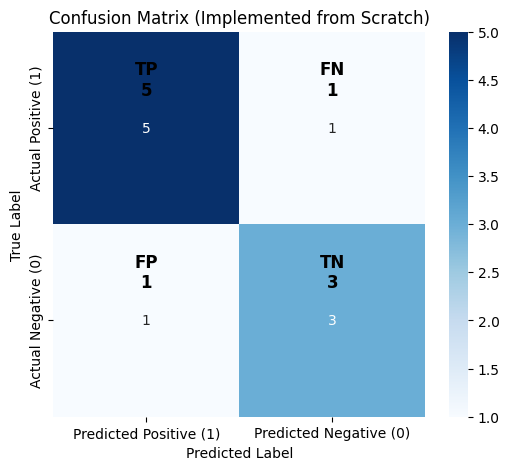

In [9]:
# Seaborn을 사용한 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_manual, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Positive (1)', 'Predicted Negative (0)'], 
            yticklabels=['Actual Positive (1)', 'Actual Negative (0)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Implemented from Scratch)')

# 각 셀에 값의 의미를 명시하는 텍스트 추가
plt.text(0.5, 0.25, f'TP\n{tp}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 0.25, f'FN\n{fn}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(0.5, 1.25, f'FP\n{fp}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 1.25, f'TN\n{tn}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()

### 5. 주요 성능 지표 직접 계산하기

혼동 행렬의 네 가지 요소를 기반으로 주요 평가지표들을 직접 계산하는 함수를 만듭니다. 각 지표의 공식을 코드로 옮기는 과정에서 그 의미를 다시 한번 확인할 수 있습니다.

In [10]:
def compute_metrics(tp, tn, fp, fn):
    """혼동 행렬 요소들로 주요 평가지표를 계산합니다."""
    
    # 0으로 나누는 것을 방지하기 위한 작은 값
    epsilon = 1e-7
    
    # 정확도 (Accuracy)
    accuracy = (tp + tn) / (tp + tn + fp + fn + epsilon)
    
    # 정밀도 (Precision)
    precision = tp / (tp + fp + epsilon)
    
    # 재현율 (Recall)
    recall = tp / (tp + fn + epsilon)
    
    # F1 점수 (F1 Score)
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)
    
    return accuracy, precision, recall, f1

# 함수를 호출하여 지표 계산
accuracy, precision, recall, f1 = compute_metrics(tp, tn, fp, fn)

print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1 점수 (F1 Score): {f1:.4f}")

정확도 (Accuracy): 0.8000
정밀도 (Precision): 0.8333
재현율 (Recall): 0.8333
F1 점수 (F1 Score): 0.8333


### 6. 결론 및 해석

라이브러리 없이 혼동 행렬과 평가지표를 직접 구현함으로써, 우리는 각 요소가 어떻게 계산되는지 명확히 알 수 있습니다. 이 과정은 모델의 예측 결과를 단순히 '맞았다/틀렸다'로 판단하는 것을 넘어, **'어떻게 틀렸는지'**를 구체적으로 분석할 수 있게 해줍니다.

- **FP가 높다면?**: 모델이 Negative를 Positive로 잘못 판단하는 경향이 있음 (정밀도 하락).
- **FN이 높다면?**: 모델이 Positive를 Negative로 놓치는 경향이 있음 (재현율 하락).

이러한 분석은 모델의 임계값(Threshold)을 조정하거나, 특정 종류의 에러를 줄이기 위한 피처 엔지니어링, 데이터 수집 등 모델 개선 방향을 설정하는 데 중요한 단서를 제공합니다.

### 한 문장 요약

혼동 행렬을 직접 구현하는 과정은 실제값과 예측값을 비교하여 TP, TN, FP, FN을 세는 단순한 작업이지만, 이를 통해 분류 모델의 성능을 다각도로 분석하는 모든 평가지표의 근본 원리를 이해할 수 있다.